In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
air_quality_csv = "../07-Project-1/daily_aqi_by_cbsa_2018.csv"

In [3]:
air_quality_df = pd.read_csv(air_quality_csv, encoding="ISO-8859-1")

In [4]:
air_quality_df.head()

,CBSA,state,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Aberdeen,SD,10100,1/2/18,29,Good,PM2.5,46-013-0003,1
1,Aberdeen,SD,10100,1/5/18,36,Good,PM2.5,46-013-0003,1
2,Aberdeen,SD,10100,1/8/18,22,Good,PM2.5,46-013-0003,1
3,Aberdeen,SD,10100,1/14/18,22,Good,PM2.5,46-013-0003,1
4,Aberdeen,SD,10100,1/17/18,16,Good,PM2.5,46-013-0003,1


In [5]:
cleanish_air_quality_df= air_quality_df[['state', 'Date', 'AQI', 'Category', 'Defining Parameter']]

In [6]:
cleanish_air_quality_df.head()

,state,Date,AQI,Category,Defining Parameter
0,SD,1/2/18,29,Good,PM2.5
1,SD,1/5/18,36,Good,PM2.5
2,SD,1/8/18,22,Good,PM2.5
3,SD,1/14/18,22,Good,PM2.5
4,SD,1/17/18,16,Good,PM2.5


In [19]:
#grouped_state_air_quality = cleanish_air_quality_df.set_index('state')

In [7]:
state_AQI_df = cleanish_air_quality_df.groupby('state')

In [8]:
mean_state_API = state_AQI_df.mean()
mean_state_API.head()

,AQI
state,
AK,36.072089
AL,41.207050
AR,38.096038
AR-MO,44.191781
AR-OK,37.181818


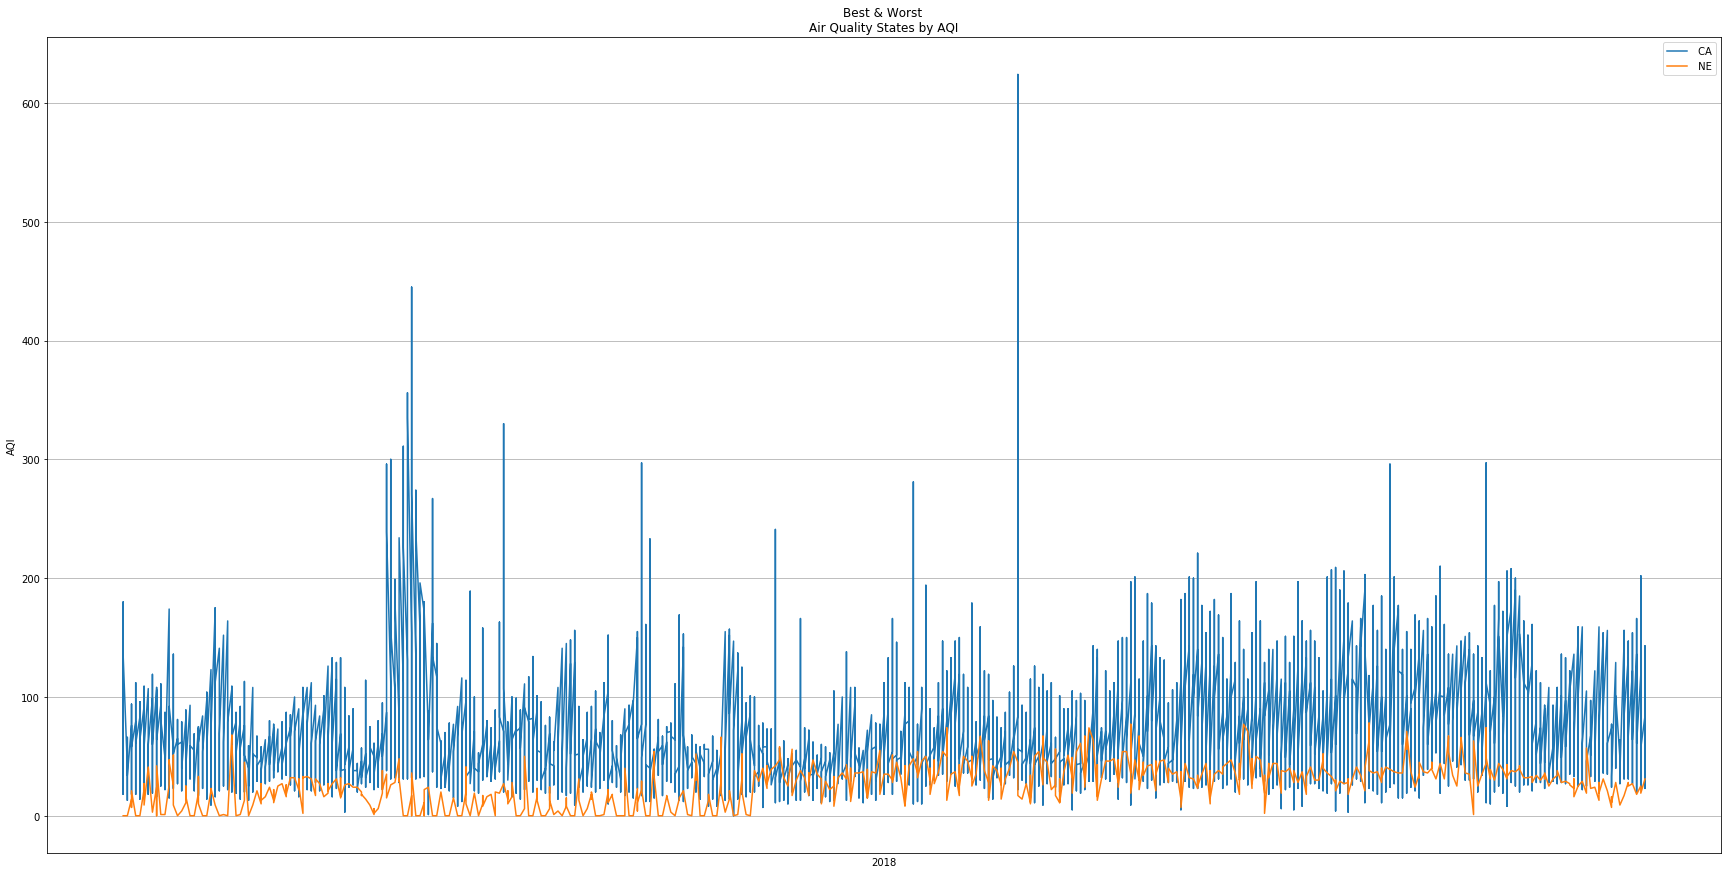

In [11]:
drop_air_quality_df = cleanish_air_quality_df.drop(['Category', 'Defining Parameter'], axis=1)
line_air_index = drop_air_quality_df.set_index(['state','Date']).sort_index()
line_air_index = line_air_index.dropna()
line_air_index = line_air_index.reset_index()


def line_reponse(state):
    line_data = line_air_index[line_air_index['state']==state]
    
    plt.plot(line_data['Date'], line_data['AQI'])
    plt.legend(states)
    plt.title("Best & Worst \nAir Quality States by AQI")
    plt.xlabel("2018")
    plt.ylabel("AQI")
    plt.xticks([])

states = [' CA', ' NE']
plt.figure(figsize=(30,15))

for state in states:
    line_reponse(state)
    
plt.grid(axis='y')

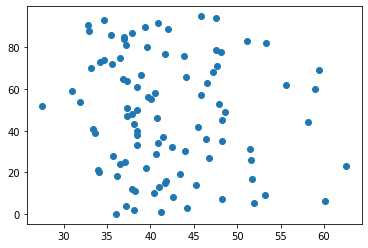

In [12]:
xaxis = np.arange(len(mean_state_API))

plt.scatter(mean_state_API, xaxis)

state
 AK          36.072089
 AL          41.207050
 AR          38.096038
 AR-MO       44.191781
 AR-OK       37.181818
               ...    
 WV          32.817345
 WV-KY-OH    40.821918
 WV-OH       34.634703
 WY          47.524315
 WY-ID       45.857534
Name: AQI, Length: 96, dtype: float64


TypeError: only size-1 arrays can be converted to Python scalars

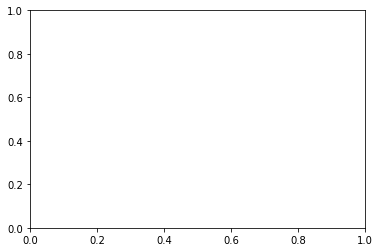

In [13]:
xaxis = np.arange(len(mean_state_API))

means = mean_state_API.loc[:, 'AQI']

print(means)

plt.bar(xaxis, mean_state_API)